In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf #needed for models in this script
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
pd.set_option('html', True) #see the dataframe in a more user friendly manner
%matplotlib inline

## Naive Bayes Classification Overview

The probabilistic model of Naive Bayes classifiers is based on Bayes’ Theorem, while the adjective “naive” comes from the assumption that the features in the data are mutually independent. (In other words, the features in our data aren't like Barack Obama being elected President and Joe Biden being elected Vice President.) More often than not, the features in the data aren't mutually independent, but Naive Bayes classifiers still perform well, and they perform especially well on small sample sizes, which is one of their main advantages. In this lesson, we'll look at the probability model of the Naive Bayes classifier and apply the concept to construct a classifier.

Very simply, a Naive Bayes classifier will take an observation, compute the Bayesian probability of each possible hypothesis, and select the hypothesis with the highest probability (the Maximum A Posteriori (MAP) hypothesis) to classify the observation.

## Data Cleaning and Exploration

We're going to use a dataset of ideal versus actual weight to classify gender. You can download the csv file here: https://www.dropbox.com/s/hg0tqy6saqeoq0j/ideal_weight.csv?dl=0

* Remove the single quotes from the column names.
* Remove the single quotes from the "sex" column.
* Plot the distributions of actual weight and ideal weight.

In [4]:
#read in data:
weight_frame = pd.read_csv('ideal_weight.csv')
weight_frame.head(2)

,'id','sex','actual','ideal','diff'
0,0,'Male',215,190,25
1,1,'Female',155,135,20


In [9]:
weight_frame.rename(columns=lambda x: x.replace("'", ""), inplace=True) #Remove the single quotes from the column names
weight_frame['sex'] = weight_frame['sex'].apply(lambda x: x.strip("'")) #Remove the single quotes from the "sex" column.
weight_frame.head(2)

,id,sex,actual,ideal,diff
0,0,Male,215,190,25
1,1,Female,155,135,20


Distribution of actual weight vs. ideal weight:

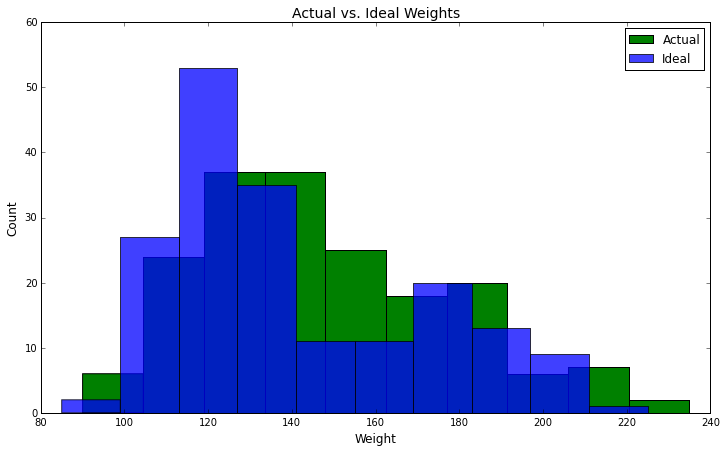

In [22]:
plt.figure(figsize=(12,7))
plt.hist(weight_frame['actual'], color='green', label='Actual')
plt.hist(weight_frame['ideal'],color='blue', alpha=0.75, label='Ideal')
plt.title("Actual vs. Ideal Weights", fontsize=14)
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend()
plt.show()

Plot the distributions of difference in weight:

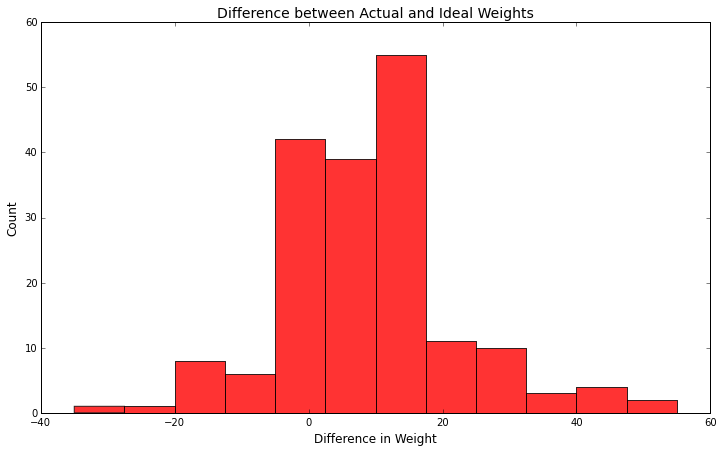

In [24]:
plt.figure(figsize=(12,7))
plt.hist(weight_frame['diff'], color='red', bins = 12, alpha=0.8)
plt.title("Difference between Actual and Ideal Weights", fontsize=14)
plt.xlabel("Difference in Weight", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

* Map "sex" to a categorical variable.
* Are there more women or men in the dataset?

In [25]:
print weight_frame.dtypes
print ''
weight_frame['sex'] = weight_frame['sex'].astype('category')
print weight_frame.dtypes

id         int64
sex       object
actual     int64
ideal      int64
diff       int64
dtype: object

id           int64
sex       category
actual       int64
ideal        int64
diff         int64
dtype: object


In [26]:
weight_frame.sex.value_counts()

Female    119
Male       63
dtype: int64

## Naive Bayes Analysis

We're going to use the <b>sklearn.naive_bayes.GaussianNB</b> (http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) to build our classifier of gender. A Gaussian Naive Bayes classifier assumes that the likelihood of the features is assumed to be Gaussian.

* Fit a Naive Bayes classifier of sex to actual weight, ideal weight, and diff.
* How many points were mislabeled? How many points were there in the dataset, total?
* Predict the sex for an actual weight of 145, an ideal weight of 160, and a diff of -15.
* Predict the sex for an actual weight of 160, an ideal weight of 145, and a diff of 15.